Taken from website:-
https://ourworldindata.org/coronavirus-source-data

Import libraries

In [403]:
import pandas as pd
import numpy as np

Read files

In [404]:
# load datasets
train = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56650,ZWE,Africa,Zimbabwe,2020-12-23,12656.0,112.0,129.571,330.0,4.0,2.429,851.515,7.536,8.718,22.203,0.269,0.163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1501.0,203022.0,13.66,0.101,1710.0,0.115,0.076,13.2,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56651,ZWE,Africa,Zimbabwe,2020-12-24,12786.0,130.0,131.429,339.0,9.0,3.571,860.261,8.747,8.843,22.808,0.606,0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56652,ZWE,Africa,Zimbabwe,2020-12-25,12880.0,94.0,119.000,341.0,2.0,3.571,866.586,6.324,8.006,22.943,0.135,0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56653,ZWE,Africa,Zimbabwe,2020-12-26,12963.0,83.0,116.000,341.0,0.0,3.286,872.170,5.584,7.805,22.943,0.000,0.221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [405]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56655 entries, 0 to 56654
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            56330 non-null  object 
 1   continent                           55989 non-null  object 
 2   location                            56655 non-null  object 
 3   date                                56655 non-null  object 
 4   total_cases                         56098 non-null  float64
 5   new_cases                           56092 non-null  float64
 6   new_cases_smoothed                  55136 non-null  float64
 7   total_deaths                        47888 non-null  float64
 8   new_deaths                          47887 non-null  float64
 9   new_deaths_smoothed                 55136 non-null  float64
 10  total_cases_per_million             55773 non-null  float64
 11  new_cases_per_million               55767

In [406]:
country = "United Kingdom"

include_uk = train[train['location'].values == country]
exclude_uk = train[train['location'].values != country]
include_uk

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
53259,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53260,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53261,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53262,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53263,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53586,GBR,Europe,United Kingdom,2020-12-23,2155996.0,39387.0,33894.286,69157.0,748.0,505.571,31759.065,580.193,499.282,1018.723,11.018,7.447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507384.0,49434314.0,728.196,7.474,437220.0,6.441,0.078,12.9,tests performed,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53587,GBR,Europe,United Kingdom,2020-12-24,2195144.0,39148.0,34410.857,69732.0,575.0,511.714,32335.737,576.673,506.892,1027.193,8.470,7.538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800000.0,1.18,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53588,GBR,Europe,United Kingdom,2020-12-25,2227947.0,32803.0,35017.000,70302.0,570.0,523.143,32818.945,483.207,515.821,1035.589,8.396,7.706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53589,GBR,Europe,United Kingdom,2020-12-26,2262735.0,34788.0,36094.000,70513.0,211.0,476.571,33331.392,512.447,531.685,1038.697,3.108,7.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922


In [407]:
uk_newdeath = pd.DataFrame({'date':include_uk.date , 'new_cases': include_uk.new_cases, 'new_deaths': include_uk.new_deaths}).reset_index()
uk_newdeath

,index,date,new_cases,new_deaths
0,53259,2020-01-31,2.0,NaN
1,53260,2020-02-01,0.0,NaN
2,53261,2020-02-02,0.0,NaN
3,53262,2020-02-03,6.0,NaN
4,53263,2020-02-04,0.0,NaN
...,...,...,...,...
327,53586,2020-12-23,39387.0,748.0
328,53587,2020-12-24,39148.0,575.0
329,53588,2020-12-25,32803.0,570.0
330,53589,2020-12-26,34788.0,211.0


Rename columns

In [408]:
uk_newdeath.rename(columns={'date':'ds', 'new_cases': 'add1', 'new_deaths': 'y'}, inplace=True)
uk_newdeath

,index,ds,add1,y
0,53259,2020-01-31,2.0,NaN
1,53260,2020-02-01,0.0,NaN
2,53261,2020-02-02,0.0,NaN
3,53262,2020-02-03,6.0,NaN
4,53263,2020-02-04,0.0,NaN
...,...,...,...,...
327,53586,2020-12-23,39387.0,748.0
328,53587,2020-12-24,39148.0,575.0
329,53588,2020-12-25,32803.0,570.0
330,53589,2020-12-26,34788.0,211.0


Graph time series

Text(0, 0.5, 'y')

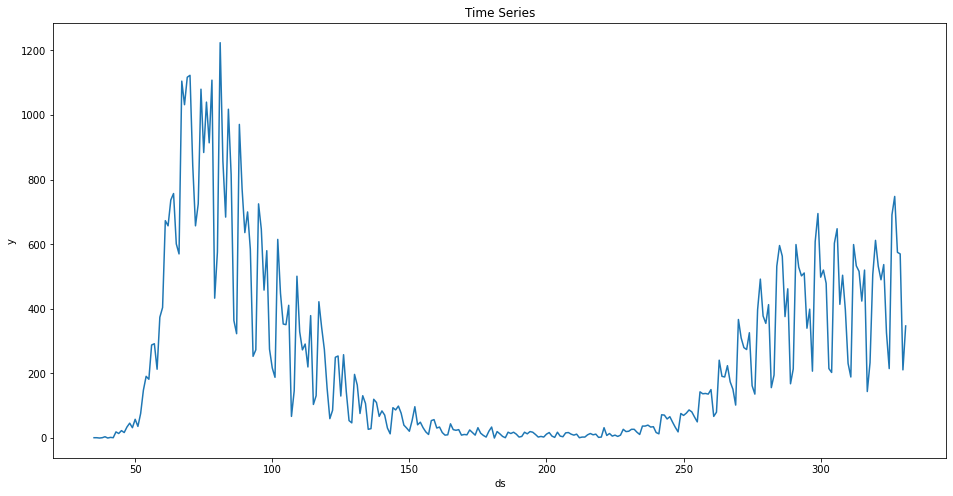

In [409]:
import matplotlib.pyplot as plt

uk_newdeath['y'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("ds") 
plt.ylabel("y")

Split time series

In [410]:
month = '2021-01'

test = pd.DataFrame({
    'date': pd.date_range(
        start = pd.Timestamp(month),                        
        end = pd.Timestamp(month) + pd.offsets.MonthEnd(0),
        freq = 'D'
    )
})
test

,date
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
5,2021-01-06
6,2021-01-07
7,2021-01-08
8,2021-01-09
9,2021-01-10


In [411]:
test['new_case'] = uk_newdeath.add1.max()
test

,date,new_case
0,2021-01-01,39387.0
1,2021-01-02,39387.0
2,2021-01-03,39387.0
3,2021-01-04,39387.0
4,2021-01-05,39387.0
5,2021-01-06,39387.0
6,2021-01-07,39387.0
7,2021-01-08,39387.0
8,2021-01-09,39387.0
9,2021-01-10,39387.0


In [412]:
test.rename(columns={'date':'ds', 'new_case': 'add1'}, inplace=True)
test

,ds,add1
0,2021-01-01,39387.0
1,2021-01-02,39387.0
2,2021-01-03,39387.0
3,2021-01-04,39387.0
4,2021-01-05,39387.0
5,2021-01-06,39387.0
6,2021-01-07,39387.0
7,2021-01-08,39387.0
8,2021-01-09,39387.0
9,2021-01-10,39387.0


In [413]:
X_train = uk_newdeath.loc[uk_newdeath["ds"]<"2020-12-01"]
X_val  = uk_newdeath.loc[uk_newdeath["ds"]>="2020-12-01"]
X_test = test.loc[test["ds"]>="2021-01-01"]

FB Prophet

In [414]:
from fbprophet import Prophet

model = Prophet()
model.add_regressor('add1')
model.fit(X_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict on validation set

In [415]:
forecast = model.predict(X_val.drop(columns="y"))
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-01,-180.861372,-161.247759,374.951400,-180.861372,-180.861372,213.173875,213.173875,213.173875,290.265235,290.265235,290.265235,213.173875,213.173875,213.173875,77.091360,77.091360,77.091360,0.0,0.0,0.0,109.403863
1,2020-12-02,-183.894376,-108.461013,407.939826,-183.894376,-183.894376,291.605244,291.605244,291.605244,334.247113,334.247113,334.247113,291.605244,291.605244,291.605244,42.641869,42.641869,42.641869,0.0,0.0,0.0,150.352737
2,2020-12-03,-186.927380,-187.067322,326.610778,-186.951039,-186.893221,254.794025,254.794025,254.794025,260.891346,260.891346,260.891346,254.794025,254.794025,254.794025,6.097321,6.097321,6.097321,0.0,0.0,0.0,73.963965
3,2020-12-04,-189.960385,-113.284348,399.945296,-190.056883,-189.853372,295.755809,295.755809,295.755809,324.967979,324.967979,324.967979,295.755809,295.755809,295.755809,29.212169,29.212169,29.212169,0.0,0.0,0.0,135.007594
4,2020-12-05,-192.993389,-166.844435,351.878416,-193.173734,-192.789911,272.770266,272.770266,272.770266,275.957127,275.957127,275.957127,272.770266,272.770266,272.770266,3.186862,3.186862,3.186862,0.0,0.0,0.0,82.963739
5,2020-12-06,-196.026393,-221.471083,300.578650,-196.307371,-195.706230,324.094151,324.094151,324.094151,241.788337,241.788337,241.788337,324.094151,324.094151,324.094151,-82.305814,-82.305814,-82.305814,0.0,0.0,0.0,45.761944
6,2020-12-07,-199.059397,-283.779560,216.083255,-199.473236,-198.614827,249.727473,249.727473,249.727473,173.803705,173.803705,173.803705,249.727473,249.727473,249.727473,-75.923768,-75.923768,-75.923768,0.0,0.0,0.0,-25.255692
7,2020-12-08,-202.092401,-198.206669,327.406341,-202.658451,-201.516697,181.371958,181.371958,181.371958,258.463319,258.463319,258.463319,181.371958,181.371958,181.371958,77.091360,77.091360,77.091360,0.0,0.0,0.0,56.370917
8,2020-12-09,-205.125406,-105.742566,392.497611,-205.835675,-204.367534,302.969205,302.969205,302.969205,345.611074,345.611074,345.611074,302.969205,302.969205,302.969205,42.641869,42.641869,42.641869,0.0,0.0,0.0,140.485668
9,2020-12-10,-208.158410,-21.987848,485.620006,-209.042754,-207.236972,429.833376,429.833376,429.833376,435.930697,435.930697,435.930697,429.833376,429.833376,429.833376,6.097321,6.097321,6.097321,0.0,0.0,0.0,227.772287


In [416]:
# Calculating the RMSE of the model
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(X_val['y'], forecast['yhat'])) 
print(rms)

273.8677430459701


In [417]:
forecast.yhat[forecast.yhat < 0] = 0

df_val=pd.DataFrame({'actual': X_val.y.values, 'predicted': forecast.yhat.values.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,actual,predicted
0,603.0,109
1,648.0,150
2,414.0,73
3,504.0,135
4,397.0,82
5,231.0,45
6,189.0,0
7,599.0,56
8,533.0,140
9,516.0,227


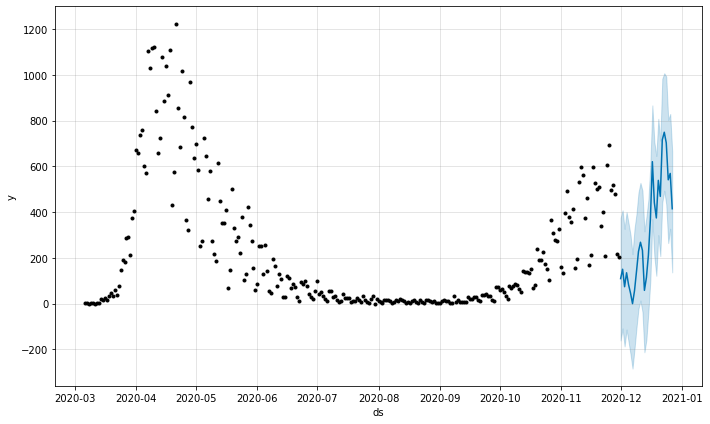

In [418]:
fig1 = model.plot(forecast)

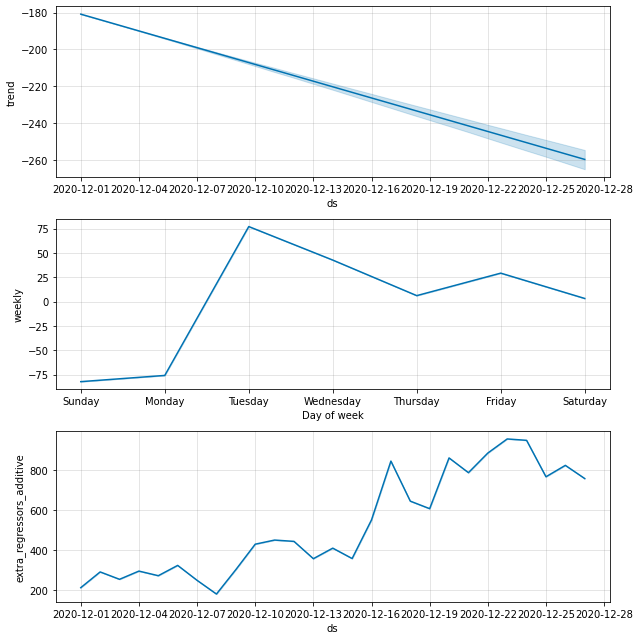

In [419]:
fig2 = model.plot_components(forecast)

In [420]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [421]:
plot_components_plotly(model, forecast)

Predict on test set

In [422]:
prediction = model.predict(X_test)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,-274.884502,456.435372,962.304840,-281.291127,-268.920912,954.26444,954.26444,954.26444,983.476610,983.476610,983.476610,954.26444,954.26444,954.26444,29.212169,29.212169,29.212169,0.0,0.0,0.0,708.592108
1,2021-01-02,-277.917506,442.702868,945.560230,-284.597551,-271.538521,954.26444,954.26444,954.26444,957.451302,957.451302,957.451302,954.26444,954.26444,954.26444,3.186862,3.186862,3.186862,0.0,0.0,0.0,679.533796
2,2021-01-03,-280.950511,332.173567,853.118956,-287.895192,-274.216715,954.26444,954.26444,954.26444,871.958627,871.958627,871.958627,954.26444,954.26444,954.26444,-82.305814,-82.305814,-82.305814,0.0,0.0,0.0,591.008116
3,2021-01-04,-283.983515,338.421618,843.540233,-291.233955,-276.913603,954.26444,954.26444,954.26444,878.340673,878.340673,878.340673,954.26444,954.26444,954.26444,-75.923768,-75.923768,-75.923768,0.0,0.0,0.0,594.357158
4,2021-01-05,-287.016519,496.237217,1020.660484,-294.575231,-279.623172,954.26444,954.26444,954.26444,1031.355801,1031.355801,1031.355801,954.26444,954.26444,954.26444,77.091360,77.091360,77.091360,0.0,0.0,0.0,744.339282
5,2021-01-06,-290.049523,445.537292,958.687321,-298.001237,-282.224512,954.26444,954.26444,954.26444,996.906309,996.906309,996.906309,954.26444,954.26444,954.26444,42.641869,42.641869,42.641869,0.0,0.0,0.0,706.856786
6,2021-01-07,-293.082527,405.604477,917.524547,-301.409840,-284.786629,954.26444,954.26444,954.26444,960.361761,960.361761,960.361761,954.26444,954.26444,954.26444,6.097321,6.097321,6.097321,0.0,0.0,0.0,667.279234
7,2021-01-08,-296.115532,437.522115,955.294742,-304.754680,-287.517587,954.26444,954.26444,954.26444,983.476610,983.476610,983.476610,954.26444,954.26444,954.26444,29.212169,29.212169,29.212169,0.0,0.0,0.0,687.361078
8,2021-01-09,-299.148536,402.571327,932.329271,-308.190865,-290.176662,954.26444,954.26444,954.26444,957.451302,957.451302,957.451302,954.26444,954.26444,954.26444,3.186862,3.186862,3.186862,0.0,0.0,0.0,658.302767
9,2021-01-10,-302.181540,318.136411,821.842319,-311.629995,-292.771179,954.26444,954.26444,954.26444,871.958627,871.958627,871.958627,954.26444,954.26444,954.26444,-82.305814,-82.305814,-82.305814,0.0,0.0,0.0,569.777087


In [423]:
prediction.yhat[prediction.yhat < 0] = 0

output = pd.DataFrame({'date': test.ds, 'new_death': prediction.yhat.values.astype(int)})
output.to_csv('p_new_death.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [424]:
#upload submission
p_new_death = pd.read_csv("p_new_death.csv")
p_new_death

,date,new_death
0,2021-01-01,708
1,2021-01-02,679
2,2021-01-03,591
3,2021-01-04,594
4,2021-01-05,744
5,2021-01-06,706
6,2021-01-07,667
7,2021-01-08,687
8,2021-01-09,658
9,2021-01-10,569


In [425]:
df_out = forecast.append(prediction)
df_out

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-01,-180.861372,-161.247759,374.951400,-180.861372,-180.861372,213.173875,213.173875,213.173875,290.265235,290.265235,290.265235,213.173875,213.173875,213.173875,77.091360,77.091360,77.091360,0.0,0.0,0.0,109.403863
1,2020-12-02,-183.894376,-108.461013,407.939826,-183.894376,-183.894376,291.605244,291.605244,291.605244,334.247113,334.247113,334.247113,291.605244,291.605244,291.605244,42.641869,42.641869,42.641869,0.0,0.0,0.0,150.352737
2,2020-12-03,-186.927380,-187.067322,326.610778,-186.951039,-186.893221,254.794025,254.794025,254.794025,260.891346,260.891346,260.891346,254.794025,254.794025,254.794025,6.097321,6.097321,6.097321,0.0,0.0,0.0,73.963965
3,2020-12-04,-189.960385,-113.284348,399.945296,-190.056883,-189.853372,295.755809,295.755809,295.755809,324.967979,324.967979,324.967979,295.755809,295.755809,295.755809,29.212169,29.212169,29.212169,0.0,0.0,0.0,135.007594
4,2020-12-05,-192.993389,-166.844435,351.878416,-193.173734,-192.789911,272.770266,272.770266,272.770266,275.957127,275.957127,275.957127,272.770266,272.770266,272.770266,3.186862,3.186862,3.186862,0.0,0.0,0.0,82.963739
5,2020-12-06,-196.026393,-221.471083,300.578650,-196.307371,-195.706230,324.094151,324.094151,324.094151,241.788337,241.788337,241.788337,324.094151,324.094151,324.094151,-82.305814,-82.305814,-82.305814,0.0,0.0,0.0,45.761944
6,2020-12-07,-199.059397,-283.779560,216.083255,-199.473236,-198.614827,249.727473,249.727473,249.727473,173.803705,173.803705,173.803705,249.727473,249.727473,249.727473,-75.923768,-75.923768,-75.923768,0.0,0.0,0.0,0.000000
7,2020-12-08,-202.092401,-198.206669,327.406341,-202.658451,-201.516697,181.371958,181.371958,181.371958,258.463319,258.463319,258.463319,181.371958,181.371958,181.371958,77.091360,77.091360,77.091360,0.0,0.0,0.0,56.370917
8,2020-12-09,-205.125406,-105.742566,392.497611,-205.835675,-204.367534,302.969205,302.969205,302.969205,345.611074,345.611074,345.611074,302.969205,302.969205,302.969205,42.641869,42.641869,42.641869,0.0,0.0,0.0,140.485668
9,2020-12-10,-208.158410,-21.987848,485.620006,-209.042754,-207.236972,429.833376,429.833376,429.833376,435.930697,435.930697,435.930697,429.833376,429.833376,429.833376,6.097321,6.097321,6.097321,0.0,0.0,0.0,227.772287


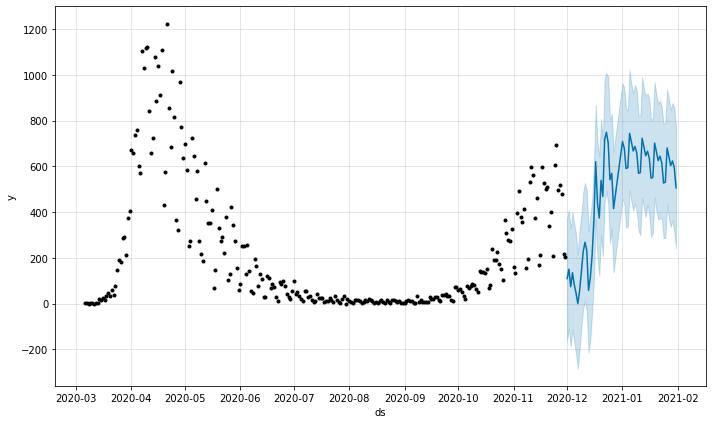

In [426]:
fig1 = model.plot(df_out)

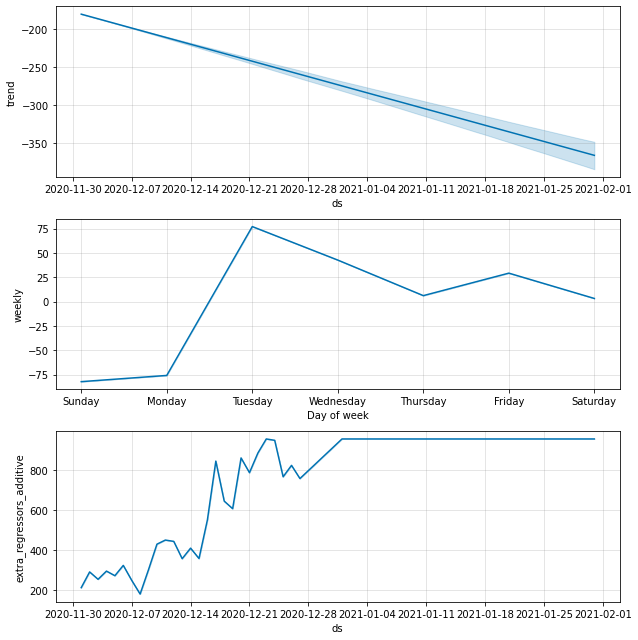

In [427]:
fig2 = model.plot_components(df_out)

In [428]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, df_out)

In [429]:
plot_components_plotly(model, df_out)

Statsmodels

Naive approach

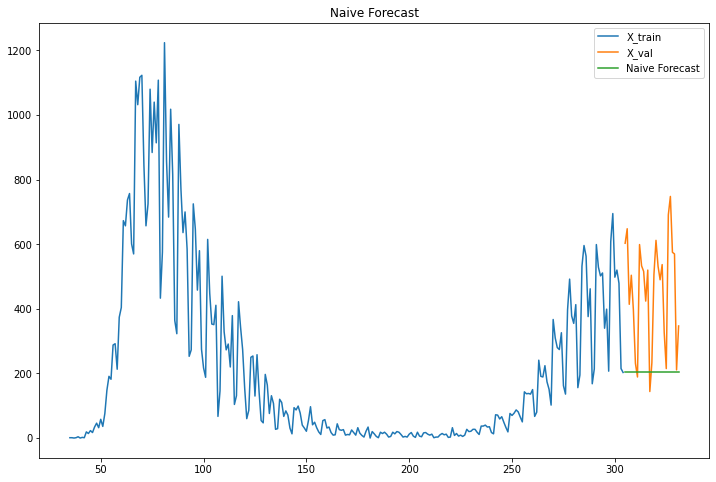

In [430]:
#naive approach
dd= np.asarray(X_train.y) 
y_hat = X_val.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [431]:
y_hat

,index,ds,add1,y,naive
305,53564,2020-12-01,13497.0,603.0,203.0
306,53565,2020-12-02,16237.0,648.0,203.0
307,53566,2020-12-03,14951.0,414.0,203.0
308,53567,2020-12-04,16382.0,504.0,203.0
309,53568,2020-12-05,15579.0,397.0,203.0
310,53569,2020-12-06,17372.0,231.0,203.0
311,53570,2020-12-07,14774.0,189.0,203.0
312,53571,2020-12-08,12386.0,599.0,203.0
313,53572,2020-12-09,16634.0,533.0,203.0
314,53573,2020-12-10,21066.0,516.0,203.0


In [432]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(X_val.y, y_hat.naive)) 
print(rms)

301.522678957862


Moving Average

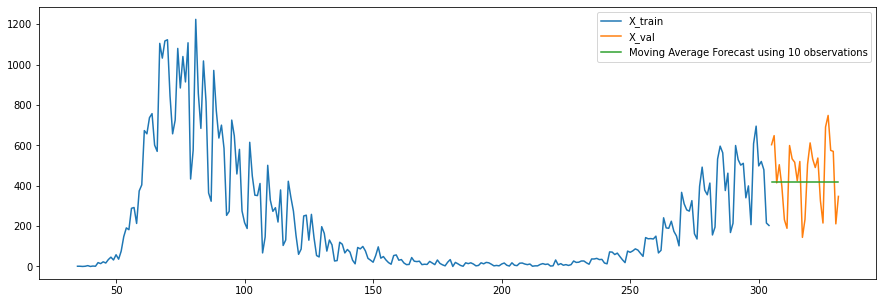

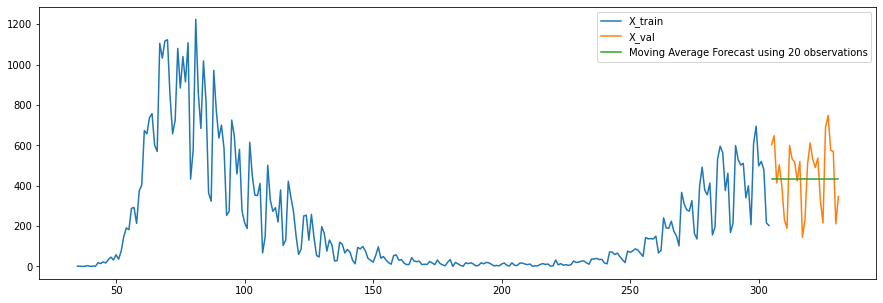

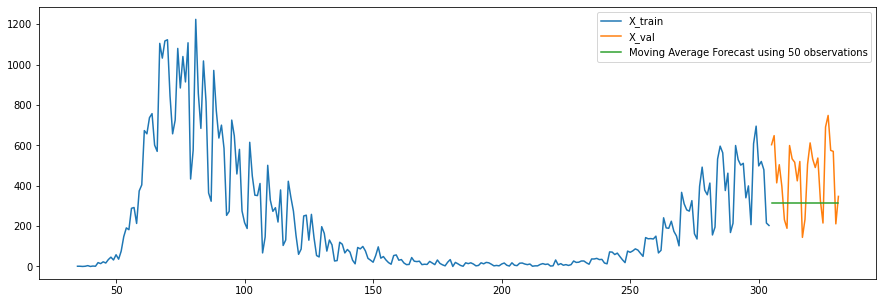

In [433]:
#moving average
# Considering rolling mean for last 10, 20, 50 days and visualize the results.
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [434]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, y_hat_avg.moving_avg_forecast)) 
print(rms)

217.82132671152834


In [435]:
#select last column from array
y_hat_avg.iloc[:,-1:] = y_hat_avg.iloc[:,-1:].astype(int)
print(y_hat_avg.iloc[:,-1:])

     moving_avg_forecast
305                  312
306                  312
307                  312
308                  312
309                  312
310                  312
311                  312
312                  312
313                  312
314                  312
315                  312
316                  312
317                  312
318                  312
319                  312
320                  312
321                  312
322                  312
323                  312
324                  312
325                  312
326                  312
327                  312
328                  312
329                  312
330                  312
331                  312
